A text analysis of Nietzsche's *The Antichrist* is performed. In particular, the distributions of some of the book's elements are studied.

In [1]:
R.version

               _                           
platform       x86_64-apple-darwin17.0     
arch           x86_64                      
os             darwin17.0                  
system         x86_64, darwin17.0          
status                                     
major          4                           
minor          0.0                         
year           2020                        
month          04                          
day            24                          
svn rev        78286                       
language       R                           
version.string R version 4.0.0 (2020-04-24)
nickname       Arbor Day                   

In [2]:
require(stringr)

require(xtable)

require(tidyverse)

require(gutenbergr)

require(tidytext)

require(dplyr)

require(curl)

require(igraph)

require(MASS)

Loading required package: stringr

Loading required package: xtable

Warning message:
“package ‘xtable’ was built under R version 4.0.2”
Loading required package: tidyverse

Warning message:
“package ‘tidyverse’ was built under R version 4.0.2”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ forcats 0.5.0
✔ readr   1.3.1     

Warning message:
“package ‘ggplot2’ was built under R version 4.0.2”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘readr’ was built under R version 4.0.2”
Warning message:
“package ‘purrr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
Warning message:
“package ‘forcats’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_con

In [3]:
#The following is a function which outputs the number of words in a sentence
words_in_sentence <- function(string){
    return(str_count(string, "\\w+"))
}

We use ```gutenbergr``` to download the text file directly from Project Gutenberg's site

In [4]:
book <- gutenberg_download(c(19322))

Determining mirror for Project Gutenberg from http://www.gutenberg.org/robot/harvest

Using mirror http://aleph.gutenberg.org



The introduction of the book, written by the translator, is ommitted.

In [8]:
book <- book[-seq(from=1, to=608, by=1), ]

Sentences from the book are extracted. After they are obtained, punctuation and numbers are deleted from them.

In [9]:
sentences <- book %>% unnest_tokens(sentences, text, "sentences")

In [10]:
sentences$sentences <- gsub(x = sentences$sentences, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = " ")

Numbers and punctuation in the text are omitted from the entire book. Then, characters and words occuring in the text are extracted. So-called 'stop words', are ommitted from our list of words.

In [11]:
book$text <- gsub(x = book$text, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = " ")

chars <- book %>% unnest_tokens(chars, text, "characters")

words <- book %>% unnest_tokens(words, text, "words")

words <- words %>% filter(!words %in% stop_words$word)

The length of sentences is computed, as well as a histogram of the sentences' lengths.

In [12]:
sentences$length <- sapply(sentences$sentences, words_in_sentence)

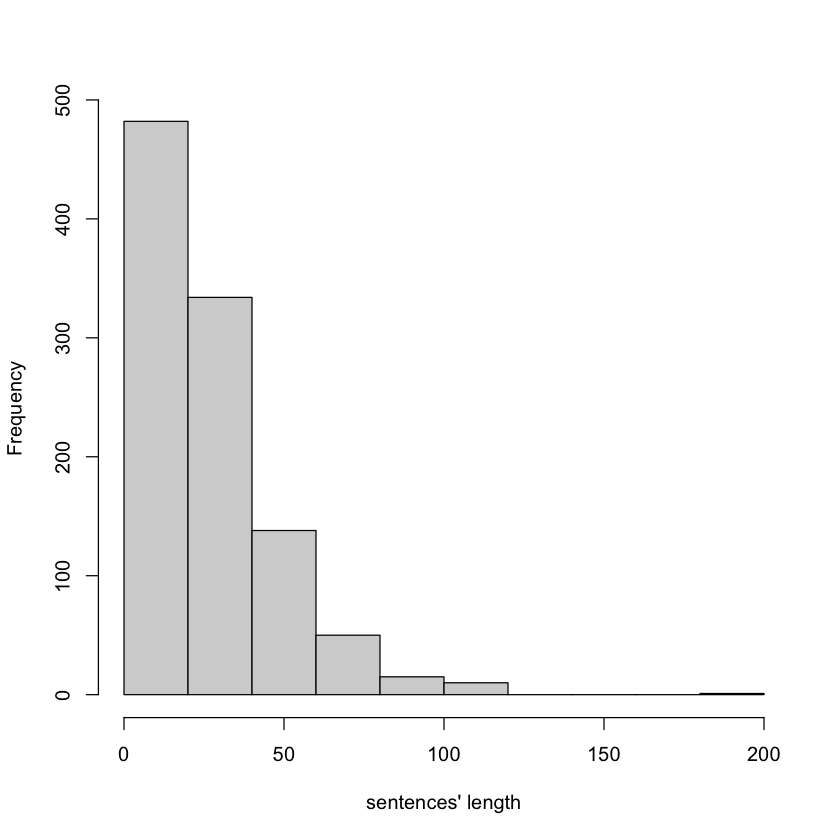

In [111]:
hist(sentences$length, xlab="sentences' length", main="")

In [128]:
png(filename="sentence_length_histogram.png", height=2000, width=2000, res=400)
hist(sentences$length, xlab="sentences' length", main="")
dev.off()

pdf 
  2

The shape of the histogram is compared to common discrete distributions, and a geometric distribution is thought to be observed. R's function ```fitdistr``` is used to fit a geometric distribution to these data.

In [16]:
fitdistr(sentences$length, "geometric")

      prob    
  0.036201322 
 (0.001107386)

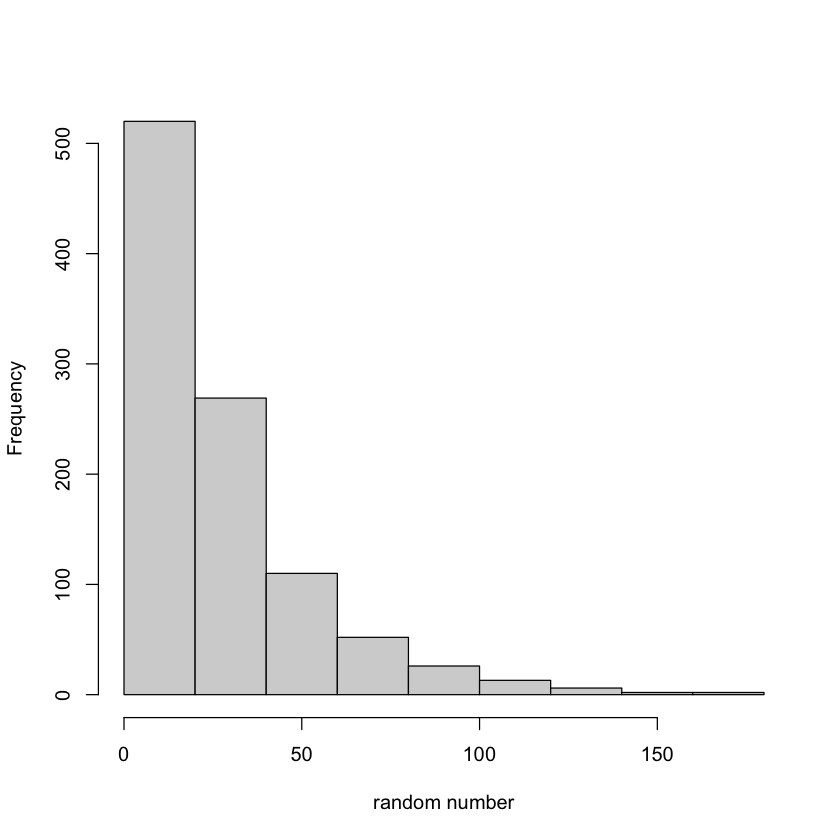

In [112]:
hist(rgeom(1000, .036), xlab="random number", main="")

In [127]:
png(filename="rgeom_histogram.png", height=2000, width=2000, res=400)
hist(rgeom(1000, .036), xlab="random number", main="")
dev.off()

pdf 
  2

The histograms look very similar, so a geometric distribution with $p = 0.36$ is assumed for the length of the sentences.

****************
*****************
Now the words in the book are analysed. Most frequent words are obtained, an a bar plot of their frequency is plotted. 

In [22]:
df_words <- as.data.frame(table(words$words), stringsAsFactors=FALSE)

names(df_words) <- c("words", "freq")

df_words <- df_words[order(df_words$freq, decreasing=TRUE),]

In [23]:
summary(df_words$freq)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   2.691   2.000 172.000 

In [24]:
quantile(df_words$freq, .95)

95% 
  8

In [25]:
freq_words <- df_words[df_words$freq > 8, ]

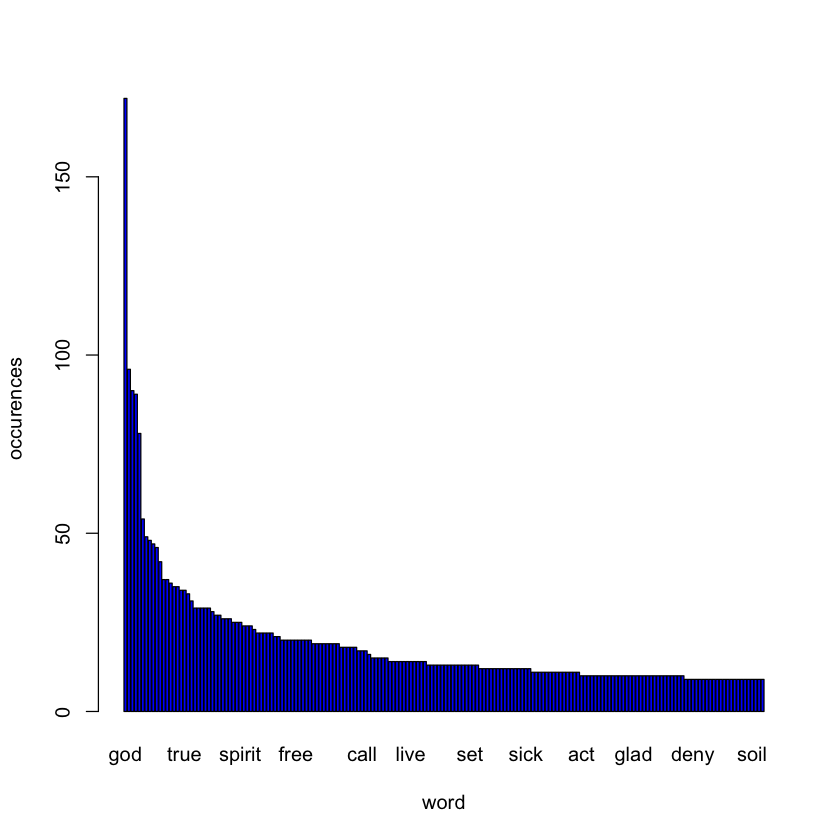

In [110]:
barplot(freq_words$freq, names.arg = freq_words$words, 
        col='blue', 
        xlab = 'word', 
        ylab = 'occurences',
       )

The barplot is interpreted as a probability mass function of the words' distribution, prior to normalizing by the amount of words.

The area between some of the words, relative to the area of the whole graphic, is computed. 

With this information, words from the text are 
generated randomly in such a way that it has a distribution similar to the words in the text.

In [31]:
freq_words[freq_words$word == "live",]

,words,freq
,<chr>,<int>
1970,live,14


In [32]:
gp1 <- freq_words[freq_words$freq <= 14, ]

In [33]:
freq_words[freq_words$word == "free",]

,words,freq
,<chr>,<int>
1394,free,20


In [34]:
gp2 <- freq_words[freq_words$freq <= 20 & freq_words$freq > 14, ]

In [35]:
freq_words[freq_words$word == "spirit",]

,words,freq
,<chr>,<int>
3152,spirit,25


In [36]:
gp3 <- freq_words[freq_words$freq <= 25 & freq_words$freq > 20, ]

In [37]:
freq_words[freq_words$word == "church",]

,words,freq
,<chr>,<int>
500,church,34


In [38]:
freq_words[freq_words$word == "power",]

,words,freq
,<chr>,<int>
2518,power,46


In [39]:
freq_words[freq_words$word == "world",]

,words,freq
,<chr>,<int>
3686,world,78


In [40]:
head(freq_words)

,words,freq
,<chr>,<int>
1449,god,172
1950,life,96
496,christian,90
497,christianity,89
3686,world,78
3456,truth,54


In [41]:
gp4 <- freq_words[freq_words$freq <= 34 & freq_words$freq > 25, ]

gp5 <- freq_words[freq_words$freq <= 42 & freq_words$freq > 34, ]

gp6 <- freq_words[freq_words$freq <= 54 & freq_words$freq > 42, ]

gp7 <- freq_words[freq_words$freq <= 96 & freq_words$freq > 54, ]

gp8 <- freq_words[freq_words$freq > 96, ]

In [46]:
#Total of words, counting how many times they appear
sum(freq_words$freq)

[1] 3504

The $[0, 1]$ interval is partitioned according to the relative area of a region between two words. 
In other words, the probability of obtaining a word $w$ with length between some numbers $a, b$ is approximated

In [43]:
p1 <- sum(gp1$freq)/3504

p2 <- p1 + sum(gp2$freq)/3504

p3 <- p2 + sum(gp3$freq)/3504

p4 <- p3 + sum(gp4$freq)/3504

p5 <- p4 + sum(gp5$freq)/3504

p6 <- p5 + sum(gp6$freq)/3504

p7 <- p6 + sum(gp7$freq)/3504

p8 <- p7 + sum(gp8$freq)/3504

In [44]:
print(c(p1, p2, p3, p4, p5, p6, p7, p8))

[1] 0.3396119 0.5005708 0.5924658 0.7171804 0.7805365 0.8501712 0.9509132
[8] 1.0000000


Next, 3504 pseudo-random numbers are generated, uniformly distributed in the 0-1 interval. The goal is to generate as many words as our book has, with the same distribution.

If pseudo-random number $p$ is betwen $p_{k-1}$ and $p_{k}$, (defining $p_0 = 0$), a random word from group $k$ (```gpk```) is stored 
in ```rand_words``` array

In [48]:
rand_words <- c()

In [49]:
for (i in 1:3504){
    p <- runif(1)
    if (p < p1){
        word <- sample(gp1$words, 1)
    } else if(p < p2){
        word <- sample(gp2$words, 1)
    } else if(p < p3){
        word <- sample(gp3$words, 1)
    } else if(p < p4){
        word <- sample(gp4$words, 1)
    } else if(p < p5){
        word <- sample(gp5$words, 1)
    } else if(p < p6){
        word <- sample(gp6$words, 1)
    } else if(p < p7){
        word <- sample(gp7$words, 1)
    } else{
        word <- sample(gp8$words, 1)
    }
        rand_words <- c(rand_words, word)
}

In [56]:
df_randwords <- as.data.frame(table(rand_words), stringsAsFactors=FALSE)

In [57]:
df_randwords <- df_randwords[order(df_randwords$Freq, decreasing=TRUE), ]

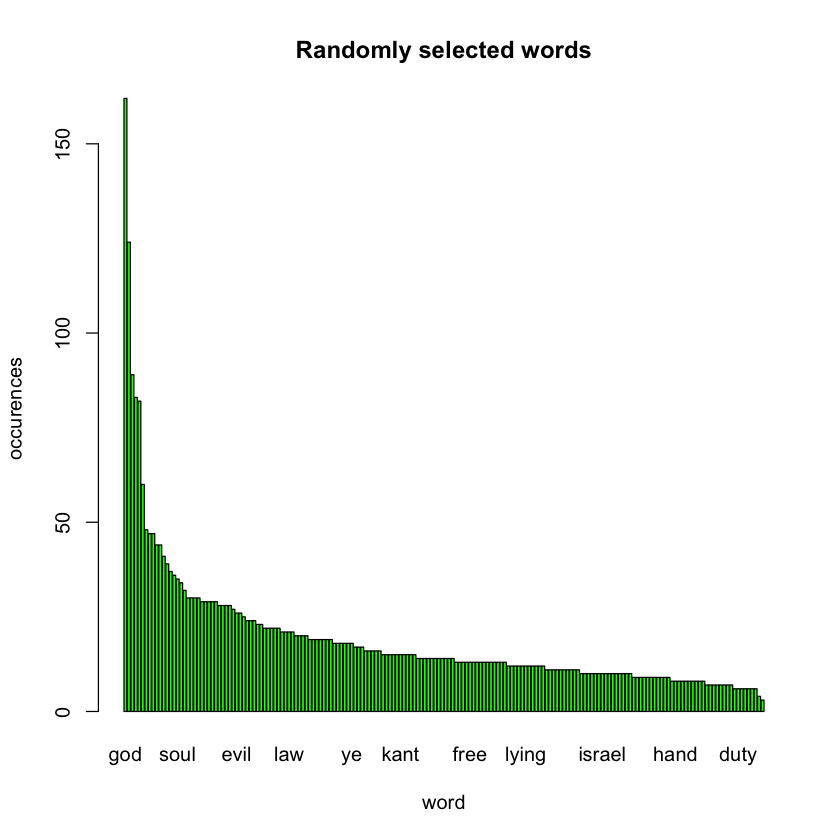

In [144]:
barplot(df_randwords$Freq, names.arg = df_randwords$rand_words, 
        col='green', 
        xlab = 'word', 
        ylab = 'occurences',
        main='Randomly selected words'
)

In [126]:
png(filename="random_words.png", height=2000, width=2000, res=400)
barplot(df_randwords$Freq, names.arg = df_randwords$rand_words, 
        col='green', 
        xlab = 'word', 
        ylab = 'occurences', 
)
dev.off()

pdf 
  2

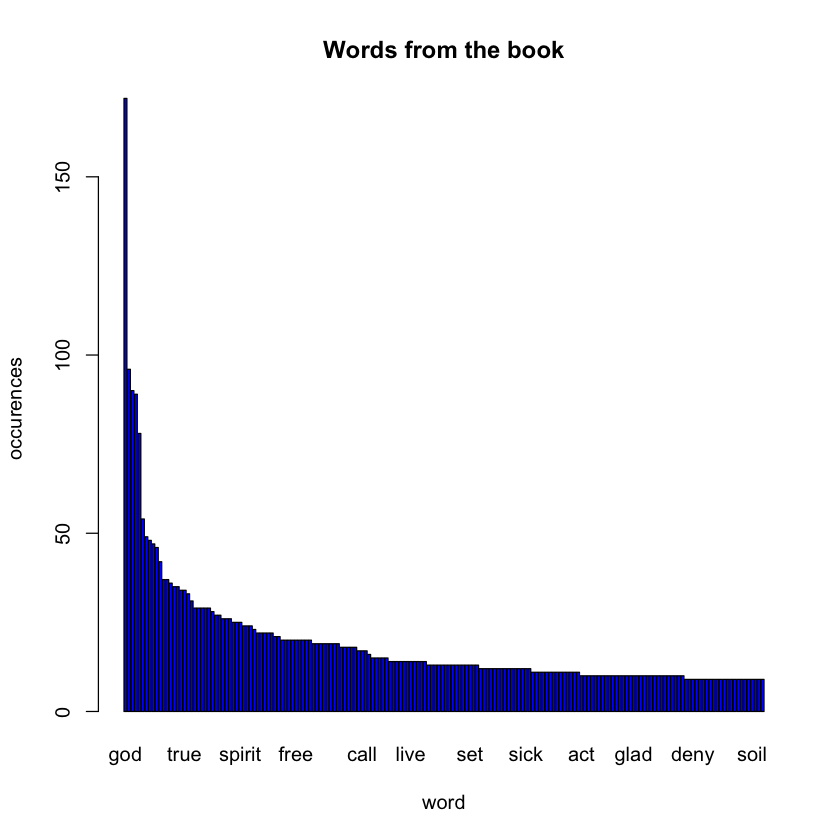

In [145]:
barplot(freq_words$freq, names.arg = freq_words$words, 
        col='blue', 
        xlab = 'word', 
        ylab = 'occurences', 
        main= 'Words from the book'
)

In [125]:
png(filename="freq_words.png", height=2000, width=2000, res=400)
barplot(freq_words$freq, names.arg = freq_words$words, 
        col='blue', 
        xlab = 'word', 
        ylab = 'occurences', 
)
dev.off()

pdf 
  2

In [60]:
summary(freq_words)

    words                freq       
 Length:184         Min.   :  9.00  
 Class :character   1st Qu.: 10.00  
 Mode  :character   Median : 13.00  
                    Mean   : 19.04  
                    3rd Qu.: 20.00  
                    Max.   :172.00  

In [61]:
summary(df_randwords)

  rand_words             Freq       
 Length:184         Min.   :  3.00  
 Class :character   1st Qu.: 10.00  
 Mode  :character   Median : 14.00  
                    Mean   : 19.04  
                    3rd Qu.: 21.00  
                    Max.   :162.00  

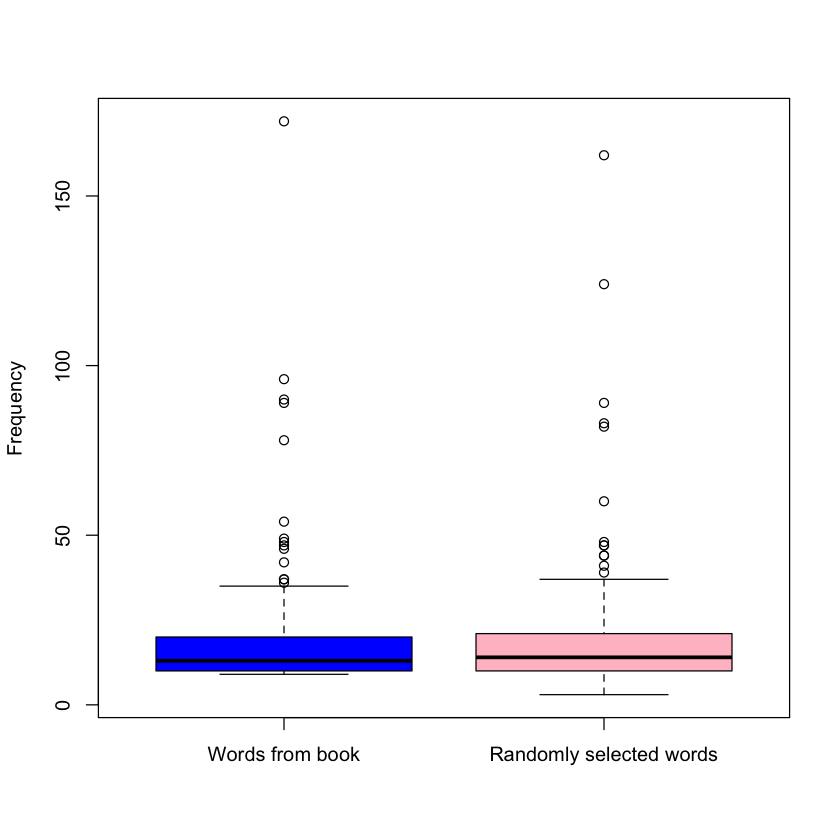

In [149]:
boxplot(freq_words$freq, 
        df_randwords$Freq,
        ylab="Frequency",
       names=c("Words from book", "Randomly selected words"),
       col=c("blue", "pink"))

In [150]:
png(filename="boxplot_words.png", height=2000, width=2000, res=400)
boxplot(freq_words$freq, 
        df_randwords$Freq,
        ylab="Frequency",
       names=c("Words from book", "Randomly selected words"),
       col=c("blue", "pink"))
dev.off()

pdf 
  2

In [90]:
head(df_randwords)

,rand_words,Freq
,<chr>,<int>
64,god,162
183,world,124
98,life,89
18,christian,83
19,christianity,82
159,sort,60


In [107]:
print(xtable(head(df_randwords)), include.rownames=FALSE)

% latex table generated in R 4.0.0 by xtable 1.8-4 package
% Mon Sep 21 16:10:19 2020
\begin{table}[ht]
\centering
\begin{tabular}{lr}
  \hline
rand\_words & Freq \\ 
  \hline
god & 162 \\ 
  world & 124 \\ 
  life &  89 \\ 
  christian &  83 \\ 
  christianity &  82 \\ 
  sort &  60 \\ 
   \hline
\end{tabular}
\end{table}


In [91]:
head(freq_words)

,words,freq
,<chr>,<int>
1449,god,172
1950,life,96
496,christian,90
497,christianity,89
3686,world,78
3456,truth,54


In [108]:
print(xtable(head(freq_words)), include.rownames=FALSE)

% latex table generated in R 4.0.0 by xtable 1.8-4 package
% Mon Sep 21 16:10:48 2020
\begin{table}[ht]
\centering
\begin{tabular}{lr}
  \hline
words & freq \\ 
  \hline
god & 172 \\ 
  life &  96 \\ 
  christian &  90 \\ 
  christianity &  89 \\ 
  world &  78 \\ 
  truth &  54 \\ 
   \hline
\end{tabular}
\end{table}


In [92]:
tail(df_randwords)

,rand_words,Freq
,<chr>,<int>
87,jew,6
111,moment,6
132,proof,6
145,rights,6
77,ideas,4
169,tidings,3


In [93]:
tail(freq_words)

,words,freq
,<chr>,<int>
2799,religious,9
3080,sins,9
3107,soil,9
3643,weak,9
3669,wisdom,9
3675,woman,9


**************
**************
Network analysis

We build a network representation of our book. Then, create a random network having the same degree distribution

In [62]:
word_pairs <- book %>% 
  unnest_tokens(
    input = text, 
    output = bigram, 
    token = 'ngrams', 
    n = 2
  ) %>% 
  filter(! is.na(bigram))

We separate the bigrams in two columns, and filter out stop words

In [63]:
word_pairs <- word_pairs %>% 
  separate(col = bigram, into = c('word1', 'word2'), sep = ' ')%>% 
  filter(! word1 %in% stop_words$word) %>% 
  filter(! word2 %in% stop_words$word) %>% 
  filter(! is.na(word1)) %>% 
  filter(! is.na(word2)) 

We count the time each bigram shows up, and named this column weight

In [64]:
word_pairs_count <- word_pairs %>% 
  count(word1, word2, sort = TRUE) %>% 
  rename(weight = n)

We extract the most occurring bigrams, in this case, those appearing two or more times.

In [65]:
summary(word_pairs_count$weight)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00    1.00    1.07    1.00   10.00 

In [66]:
word_pairs_count <- word_pairs_count[word_pairs_count$weight > 1, ]

With this data, and using ```igraph``` we create a network. Each of our words represents a node, joined by an edge if they appear together as a bigram. The edges are weighted, with their weight being equal to how many times the bigram appears.

In [67]:
network <- word_pairs_count %>% graph_from_data_frame(directed = FALSE)

In [68]:
is.weighted(network)

[1] TRUE

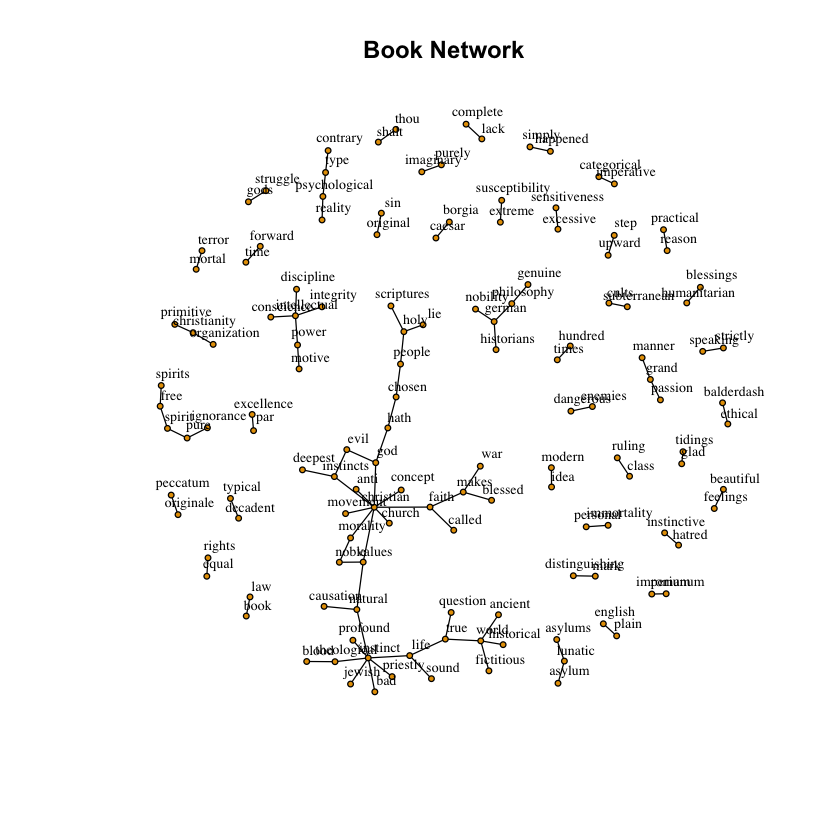

In [69]:
 plot(
  network, 
  vertex.size = 2,
  vertex.label.color = 'black', 
  vertex.label.cex = 0.7, 
  vertex.label.dist = .8,
  edge.color = 'black', 
  edge.width = 1,
  main = 'Book Network', 
  alpha = 10
)

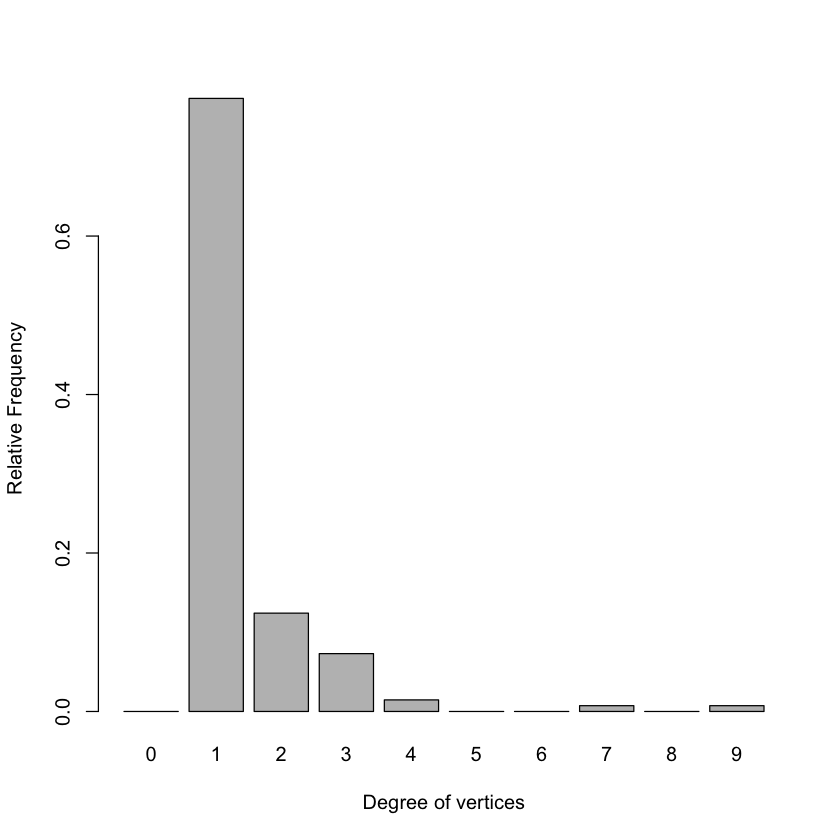

In [89]:
barplot(degree_distribution(network), 
        names=seq(0,9, by=1),
        xlab="Degree of vertices",
        ylab="Relative Frequency",
        width=1)

In [83]:
rn <- sample_degseq(degree(network), method = "simple.no.multiple")

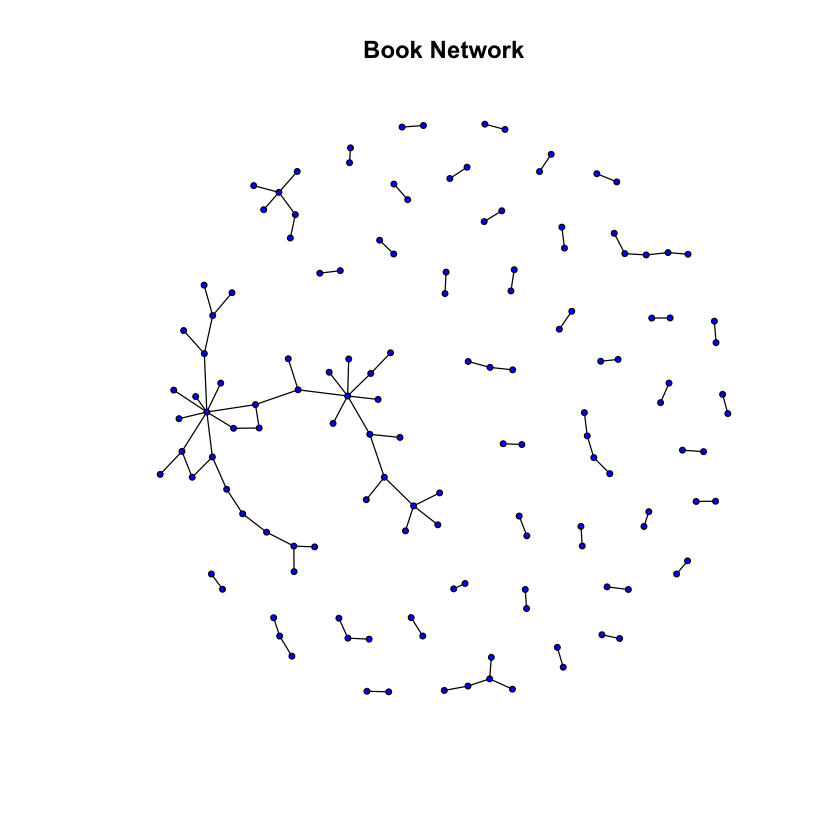

In [141]:
 plot(
  network, 
  vertex.size = 2,
  vertex.label = NA,
  vertex.color="blue",
  edge.color = 'black', 
  edge.width = 1,
  main = 'Book Network', 
  alpha = 10
)

In [142]:
#Generate png file of plot above
png(filename="book_network.png", height=2000, width=2000, res=400)
plot(
  network, 
  vertex.size = 4,
  vertex.label = NA,
  vertex.color="blue",
  edge.color = 'black', 
  edge.width = 1,
  alpha = 10
)
dev.off()

pdf 
  2

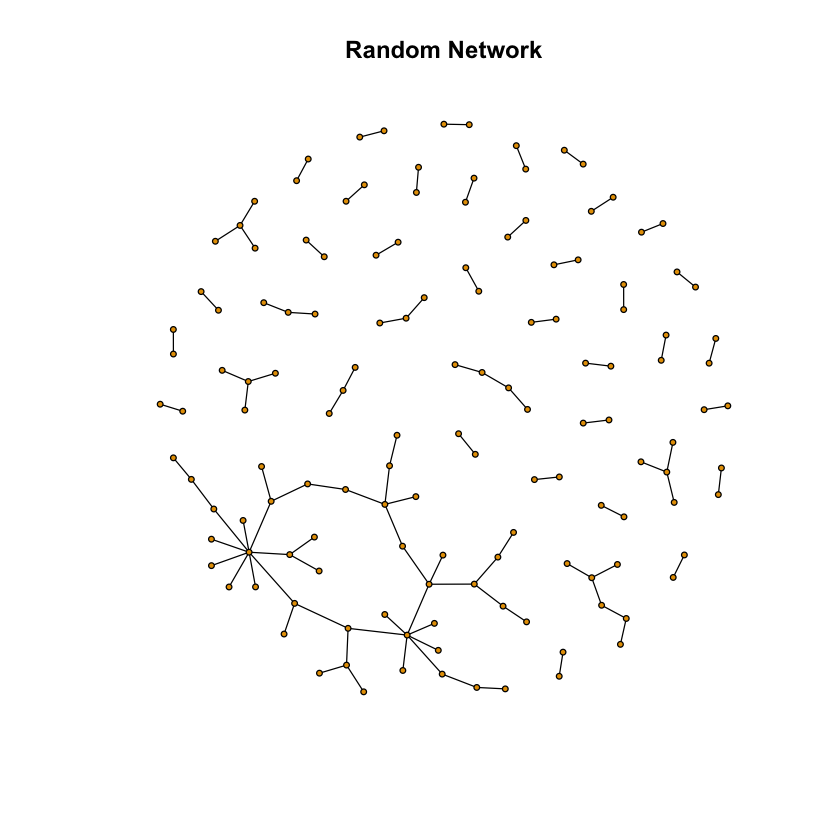

In [85]:
 plot(
  rn, 
  vertex.size = 2,
  vertex.label = NA,
  edge.color = 'black', 
  edge.width = 1,
  main = 'Random Network', 
  alpha = 10
)

In [143]:
#Generate png file of plot above
png(filename="random_network.png", height=2000, width=2000, res=400)
plot(
  rn, 
  vertex.size = 4,
  vertex.label = NA,
  vertex.color = "red",
  edge.color = 'black', 
  edge.width = 1,
  alpha = 10
)
dev.off()

pdf 
  2